# Data Preparations

In [3]:
# Below we are importing the pandas library which is necessary step import the dataset.
import pandas as pd

data = pd.read_csv('wine-seen.csv')

data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0
1,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
2,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0
3,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1
4,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1
164,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
165,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0
166,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1


In [4]:
# Let's run info method to validate the data, if its in proper format and if any null values are there to take care of? 
# We can confirm from below that there are no null values and we can easily work upon this data.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       168 non-null    float64
 1   malic_acid                    168 non-null    float64
 2   ash                           168 non-null    float64
 3   alcalinity_of_ash             168 non-null    float64
 4   magnesium                     168 non-null    float64
 5   total_phenols                 168 non-null    float64
 6   flavanoids                    168 non-null    float64
 7   nonflavanoid_phenols          168 non-null    float64
 8   proanthocyanins               168 non-null    float64
 9   color_intensity               168 non-null    float64
 10  hue                           168 non-null    float64
 11  od280/od315_of_diluted_wines  168 non-null    float64
 12  proline                       168 non-null    float64
 13  targe

# Data Plotting

To anaylze the trends in the data.

<Axes: xlabel='alcohol', ylabel='target'>

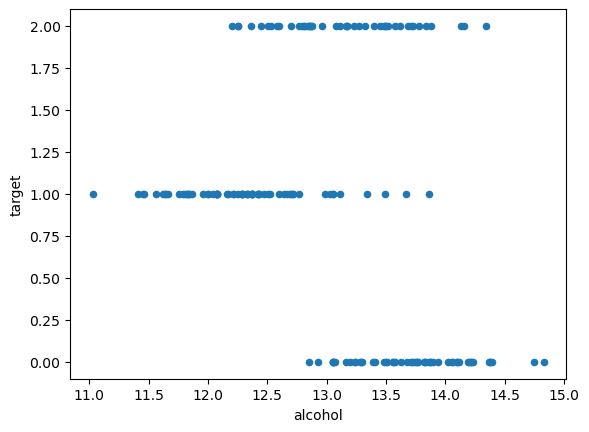

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the data to observe the alcohol vs target -> independent vs dependent variable 
data.plot.scatter(x = 'alcohol', y = 'target')

# It can be seen that a lower level of alcohol (~11.5 to 12) has a very high chance of being the wine from class 2. 
# From alcohol levels 13 to 14, it is easier to say that the wine has a really low chance of being to class 2. 

<Axes: xlabel='ash', ylabel='target'>

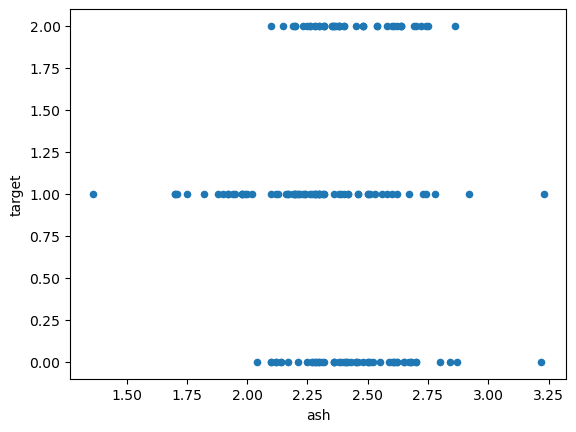

In [6]:
# Plotting the data to observe the ash vs target -> independent vs dependent variable 
data.plot.scatter(x = 'ash', y = 'target')

# This plot also shows similar trends as Alcohol.

# Data Splitting Test & Train

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

Y = data.values[:, -1]
X = data.values[:, 0:13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_test.shape)

Shape of X_train:  (134, 13)
Shape of X_test:  (34, 13)
Shape of y_train:  (134,)
Shape of y_test (34,)


# Data Training 1

## Logistics Regression Model

### This is done without any feature engineering, let's see the results

In [8]:
# Logistics regression on existing data without feature engineering

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Standardizing the data
standardization = StandardScaler()
standardization.fit(X_train)
X_train = standardization.transform(X_train)
X_test = standardization.transform(X_test)

log_model = LogisticRegression(C = 1000, max_iter = 1500, random_state = 42)
log_model.fit(X_train, Y_train)
print("Accuracy score: " + str(accuracy_score(Y_test, log_model.predict(X_test))))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, log_model.predict(X_test))))
print("\nClassification report: \n" + str(classification_report(Y_test, log_model.predict(X_test))))

# Accuracy score is 1, on the first run which shows some trend of overfitting. 
# In order to get some good prediction results we will have to do feature engineering which is must based on the result obtained. 

Accuracy score: 1.0

Confusion matrix: 
[[11  0  0]
 [ 0 16  0]
 [ 0  0  7]]

Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



# Feature Engineering

## Lasso Regularization

### Reason to choose Lasso Regularization 

Lasso regularization performs feature selection by automatically setting some of the coefficients to zero, effectively removing irrelevant features from the model. This can help in identifying the most important features for prediction and improving model interpretability.

Another reason:
Lasso regression uses L1 regularization, which adds a penalty term to the loss function based on the absolute values of the coefficients. This helps in preventing overfitting and improving the generalization ability of the model.

In [9]:
# Lasso

# Importing needed libraies
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Standardizing the data
scaler = StandardScaler()
X_train_standardized, X_test_standardized = scaler.fit_transform(X_train), scaler.transform(X_test)

# Initialize and fit the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha as needed
lasso_model.fit(X_train_standardized, Y_train)

# Extract selected features
selected_features = []
for coef, feature in zip(lasso_model.coef_, range(len(X_train[0]))):
    if coef != 0:
        selected_features.append(feature)

df_columns = data.columns.tolist()
selected_feature_names = [df_columns[idx] for idx in selected_features]

# Evaluate the regularization performance, by using the 5-fold cross validation 
cv_scores = cross_val_score(lasso_model, X_train_standardized, Y_train, cv=5, scoring='r2')

print("Selected Features:", selected_features)
print("Selected Feature Names:", selected_feature_names)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Selected Features: [3, 6, 10, 11, 12]
Selected Feature Names: ['alcalinity_of_ash', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Cross-Validation Scores: [0.76372589 0.84470072 0.85260006 0.76094623 0.85508682]
Mean CV Score: 0.815411944164785


# Data Training 2

## Logistics Regression Model

### This is done with feature engineering applied using Lasso regularization

In [10]:
# Select only the selected features for both training and test data
X_train_selected = X_train_standardized[:, selected_features]
X_test_selected = X_test_standardized[:, selected_features]

# Initialize and fit the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_selected, Y_train)

# Evaluate the logistic regression model using training and test accuracy
train_accuracy = log_model.score(X_train_selected, Y_train)
test_accuracy = log_model.score(X_test_selected, Y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9701492537313433
Test Accuracy: 0.9411764705882353


# Bias and Variance Justifications

#### After doing feature engineering we have obtained below results:

##### Training Accuracy: 0.9701492537313433 
##### Test Accuracy: 0.9411764705882353

##### Which explains that the model which is trained after using lasso regularization has less bias and less variance because 0.97 on training and 0.94 in testing data are closely matching.

# Features used for predictions after Lasso regularization to avoid over-fitting

## Features Names

1. alcalinity_of_ash
2. flavanoids
3. hue
4. od280/od315_of_diluted_wines
5. proline

/Users/aziz.zoaib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


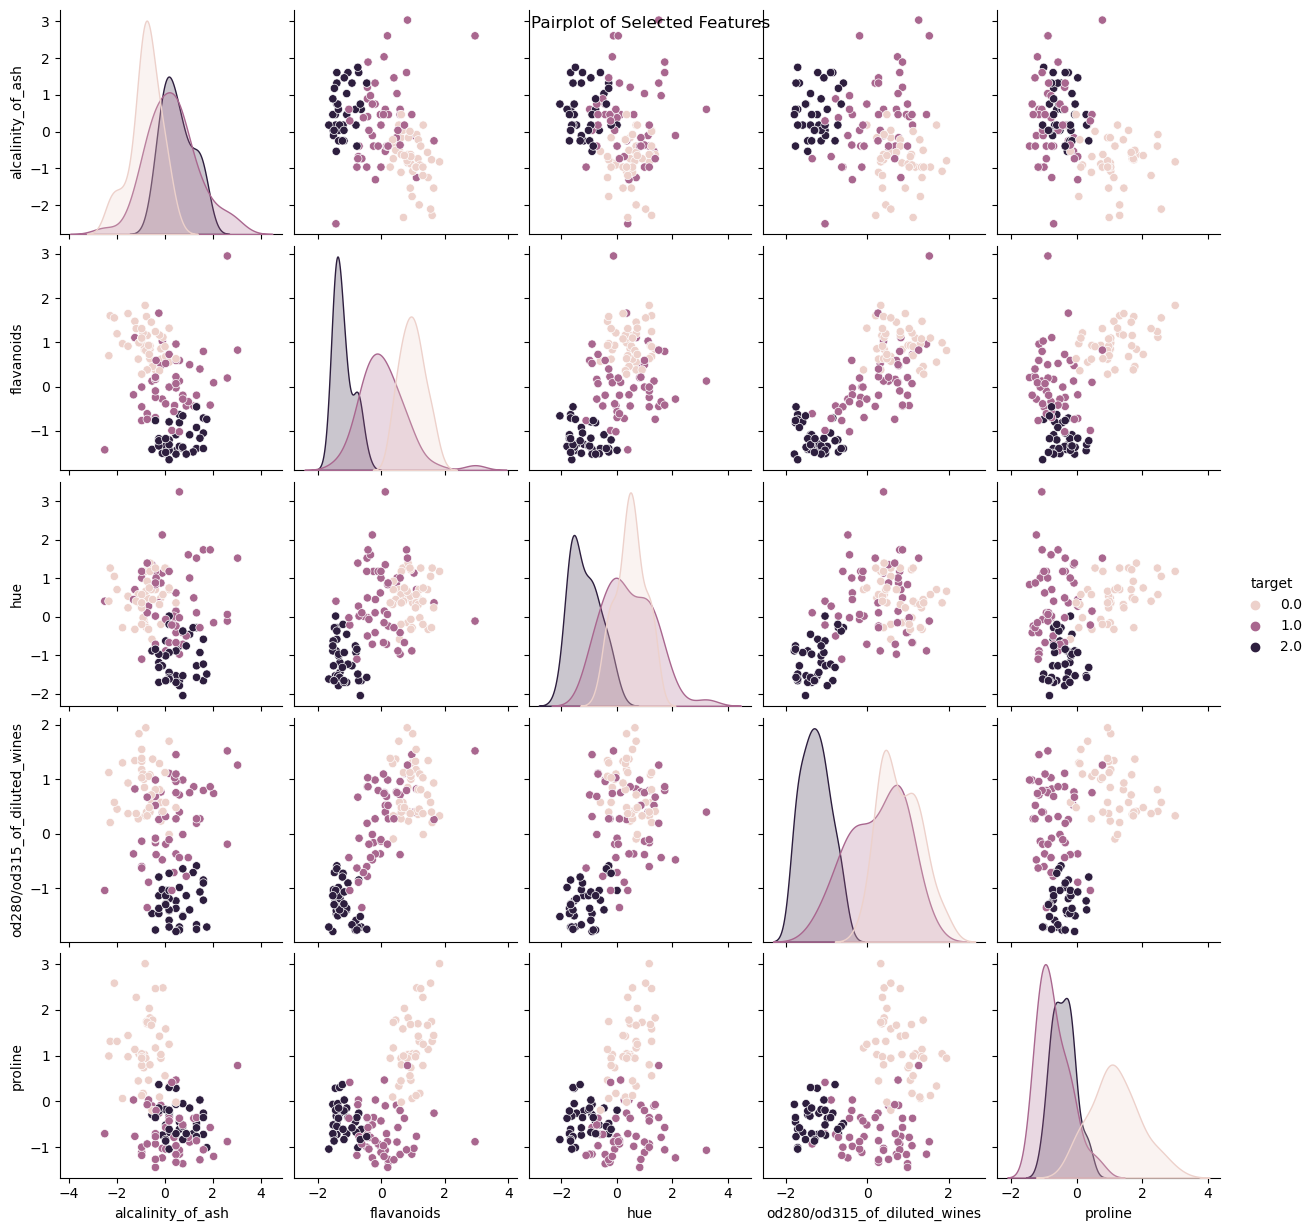

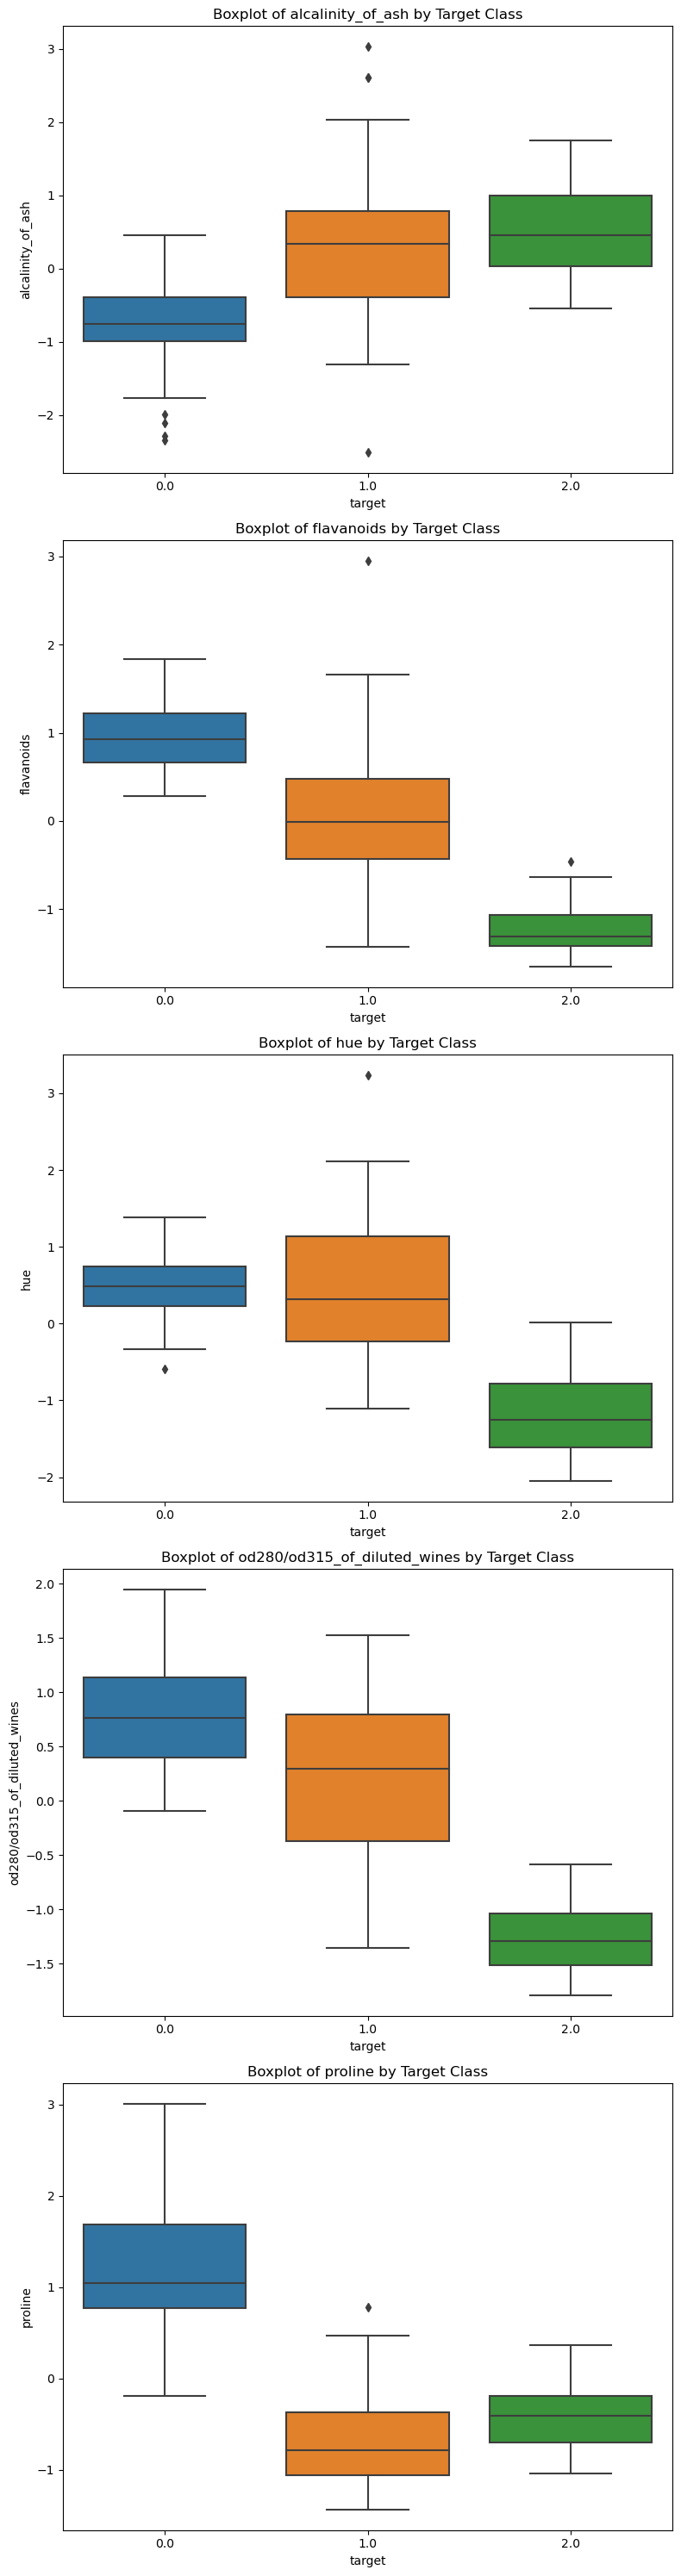

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the selected features and target variable to a DataFrame
df_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names)
df_selected['target'] = Y_train

# Pairplot to visualize relationships between selected features and target
sns.pairplot(df_selected, vars=selected_feature_names, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Boxplot to visualize the distribution of each selected feature by target class
figures, axes = plt.subplots(len(selected_feature_names), 1, figsize=(8, 6*len(selected_feature_names)))
for i, feature in enumerate(selected_feature_names):
    sns.boxplot(x='target', y=feature, data=df_selected, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Target Class')
plt.tight_layout()
plt.show()


# Apply trained model on the unseen data

In [12]:
unseen_data = pd.read_csv('wine-unseen.csv')

unseen_data

# Standardizing the data
scaler = StandardScaler()
X_unseen_standardized = scaler.fit_transform(unseen_data)

# Select only the selected features for the unseen data
X_unseen_selected = X_unseen_standardized[:, selected_features]

# Predict labels for the unseen data
unseen_pred = log_model.predict(X_unseen_selected)

# Print the predicted labels for the unseen data
print("Predicted wine class for unseen data:")
print(unseen_pred)

Predicted wine class for unseen data:
[0. 0. 2. 0. 1. 0. 1. 2. 1. 2.]
